#  Pokémon RL - Deep Learning 

## **Authors:**

* [Bruno César de Oliveira Souza](mailto:b234837@dac.unicamp.br) - [Github](https://github.com/brunocosouza)

* [Leonardo de Lellis Rossi](mailto:l261900@dac.unicamp.br) - [Github](https://github.com/leolellisr) 

* [Maurício Pereira Lopes](mailto:m225242@g.unicamp.br)

## Special Thanks:

* To our colleague **Henrique Lima Cará de Oliveira** who collaborated in the development of the codes and execution of the experiments


## Main info

[Git Repository](https://github.com/leolellisr/poke_RL)

Python files of implemented methods available [here](https://github.com/leolellisr/poke_RL/tree/master/py)

Trained models available [here](https://drive.google.com/drive/folders/17_Gn1RWOCh-ekiRhhj40ehPz9nv_d-Fy?usp=sharing)

Graphs
- [Graphs DQN and Double-DQN](https://app.neptune.ai/leolellisr/rl-pokeenv)
- [Graphs PPO](https://github.com/leolellisr/poke_RL/tree/master/images/report/ppo_results)
- [Graphs REINFORCE - Keras (2018)](https://app.neptune.ai/henriqueoliveira/rl-pokeenv/e/RLPOK-4/charts)


Images and results are showed with IFrame from IPython.display, but it needs the images stored in the [/images/report](https://github.com/leolellisr/poke_RL/tree/master/images/report) folder, available in our [git repository](https://github.com/leolellisr/poke_RL). 

Images and Results also are presented with links from imgur.

In [2]:
from IPython.display import IFrame

# Goal and Motivation

* This project aims to employ different deep reinforcement learning agents in a Pokémon battle simulator;

* In this report, we aim to go a step further into Reinforcement Learning and to employ advanced Deep Reinforcement Learning Techniques. 

* Our hypothesis is that the deep reinforcement learning trainers will perform better than tabular methods from Project 1 by using deep learning techniques. We also believe that it will automatically learn the best policy or actions, by making decisions through the analysis of states and rewards related to their performance, improving how to win battles throughout the episodes, noticing:

  * the different types between Pokémon;
  * which moves cause more damage to the opponent's Pokémon;
  * what are the possible strategies using no-damage moves;
  * and the best times to switch Pokémon. 

## **The  problem addressed**
* [Pokémon](https://www.pokemon.com) is a popular Japanese RPG (Role Playing Game) which stands a world championship every year; 
* One single [battle](https://bulbapedia.bulbagarden.net/wiki/Pokémon_battle) of Pokémon has two players. Each player has a 6-Pokémon team; 
* Each Pokémon has:
 * 6 [stats](https://bulbapedia.bulbagarden.net/wiki/Stat) (Health Points, Attack, Defense, Special Attack, Special Defense, Speed). The first 5 are used in the damage calculation. The speed defined which Pokémon moves first in the turn.
  * The Health Points goes from 100% (healthy) to 0% (fainted);
 * 4 possible moves (each with a limited number of uses). Each move has an accuracy, a percentage of success or fail;
 * one [ability](https://bulbapedia.bulbagarden.net/wiki/Ability) that has special effects in the field;
 * one [nature](https://bulbapedia.bulbagarden.net/wiki/Nature) that specifies which stats are higher and which are lower;
 * one [item](https://bulbapedia.bulbagarden.net/wiki/Item), that can  restore Health Points or increase the Power of an Attack.
* The winner of the battle is the player that makes all Pokémon of the oposing team to faint (all oposing Pokémon with health points equals zero, "last man standing" criteria);
* Only one Pokémon of each team can be at the battle field at the same time;
* Every turn, each players select one action: one of the 4 moves of their active Pokémon or [switching](https://bulbapedia.bulbagarden.net/wiki/Recall) for one of other non-fainted Pokémon of their team;

* Pokémon can be summarized as an analyze state (turn) -> take action sequence game. 

* By standard, Pokémon is a stochastic game:
 * One move can have an accuracy value less than 100%, then this move has a probability to be missed;
 * The damage moves (attacks) have the following [damage calculation](https://bulbapedia.bulbagarden.net/wiki/Damage):
  ![Damage](https://wikimedia.org/api/rest_v1/media/math/render/svg/b8c51fed93bb9a80ae8febc13700a40b8a5da402)
  
 where:
  * **[Level](https://bulbapedia.bulbagarden.net/wiki/Level)** (the level of the attacking Pokémon);
  * **A** is the effective Attack stat of the attacking Pokémon if the used move is a physical move, or the effective Special Attack stat of the attacking Pokémon if the used move is a special move;
  * **D** is the effective Defense stat of the target if the used move is a physical move or a special move that uses the target's Defense stat, or the effective Special Defense of the target if the used move is an other special move;
  * **[Power](https://bulbapedia.bulbagarden.net/wiki/Power)** is the effective power of the used move;
  * **Weather** is 1.5 if a Water-type move is being used during rain or a Fire-type move during harsh sunlight, and 0.5 if a Water-type move is used during harsh sunlight or a Fire-type move during rain, and 1 otherwise.
  * **[Critical](https://bulbapedia.bulbagarden.net/wiki/Critical_hit)** has 6.25% chance of occurs and multiplies the damage by 1.5;
  * **random** is a random factor between 0.85 and 1.00 (inclusive):
  * **[STAB](https://bulbapedia.bulbagarden.net/wiki/Same-type_attack_bonus)** is the same-type attack bonus. This is equal to 1.5 if the move's type matches any of the user's types, 2 if the user of the move additionally has the ability Adaptability, and 1 if otherwise;
  * **[Type](https://bulbapedia.bulbagarden.net/wiki/Type)** is the type effectiveness. This can be 0 (ineffective); 0.25, 0.5 (not very effective); 1 (normally effective); 2, or 4 (super effective), depending on both the move's and target's types;
  * **[Burn](https://bulbapedia.bulbagarden.net/wiki/Burn_(status_condition))** is 0.5 (from Generation III onward) if the attacker is burned, its Ability is not Guts, and the used move is a physical move (other than Facade from Generation VI onward), and 1 otherwise.
  * **other** is 1 in most cases, and a different multiplier when specific interactions of moves, Abilities, or items take effect. In this work, this is applied just to Pokémon that has the item **Life Orb**, which multiplies the damage by 1.3.
  
  * **Not** used in this work (equals 1):
   * Targets (for Battles with more than two active Pokémon in the field);
   * Badge ( just applied in Generation II);
   
   

# **MDP formulation and discretization model** 

## Original (stochastic)

We considered our original (stochastic) MDP as a tuple $M = (S, A, \phi, R)$, where:
* **S** is the whole set of possible states. One state **s $\in$ S**  is defined at each turn with 12 battle elements concatenated, that correspond to:
 * [0] Our Active Pokémon index (0: Venusaur,  1: Pikachu, 2: Tauros, 3: Sirfetch'd, 4: Blastoise, 5: Charizard);
 * [1] Opponent Active Pokémon index (0: Eevee,  1: Vaporeon, 2: Leafeon, 3: Sylveon, 4: Jolteon, 5: Umbreon);
 * [2-5] Active Pokémon moves base power (if a move doesn't have base power, default to -1);
 * [6-9] Active Pokémon moves damage multipliers;
 * [10] Our remaining Pokémon;
 * [11] Opponent remaining Pokémon.
 
* **A** is the whole set of possible actions. Our action space is a range [0, 8]. One action **a $\in$ A** is one of the possible choices:
 * [0] 1st Active Pokémon move;
 * [1] 2nd Active Pokémon move;
 * [2] 3rd Active Pokémon move;
 * [3] 4th Active Pokémon move;
 * [4] Switch to 1st next Pokémon;
 * [5] Switch to 2nd next Pokémon;
 * [6] Switch to 3rd next Pokémon;
 * [7] Switch to 4th next Pokémon;
 * [8] Switch to 5th next Pokémon.

When a selected action cannot be executed, we random select another possible action.

* **$\phi$** is a stochastic transition function that occurs from state **s** to state **s'**, by taking an action **a**. The following parameters are part of our  stochastic transition function:
 * Move's accuracy (chance of the move successfully occurs or fail);
 * Damage calculation: The **[Critical](https://bulbapedia.bulbagarden.net/wiki/Critical_hit)** parameter (6.25% chance of occurs) and the **random** parameter, ranging from 0.85 and 1.00 (inclusive).
 * Move's effects: Some moves have [additional effects](https://bulbapedia.bulbagarden.net/wiki/Additional_effect). e.g.: Iron Head have 30% chance of flinching the target (target cannot move in the turn).

* **R** is a set of rewards. A reward **r $\in$ R** is acquired in state **s** by taking the action **a**. The rewards are calculated at the end of the turn. The value of reward **r** is defined by the sum of elements:
 * +Our Active Pokémon current Health Points;
 * -2 if our Active Pokémon fainted;
 * -1 if our Active Pokémon have a [negative status condition](https://bulbapedia.bulbagarden.net/wiki/Status_condition);
 * +Number of remaining Pokémon in our team;
 * -Opponent Active Pokémon current Health Points;
 * +2 if opponent Active Pokémon fainted;
 * +1 if opponent Active Pokémon have a [negative status condition](https://bulbapedia.bulbagarden.net/wiki/Status_condition);
 * -Number of remaining Pokémon in opponent team;
 * +15 if we won the battle;
 * -15 if we lost the battle.
 
### Stochastic Team

Our stochastic team, with each Pokémon, their abilities, natures, items, moves (base power and accuracy) and possible switches are shown in [Team](https://imgur.com/KSXvlmO).

The stochastic opponent team, with each Pokémon, their abilities, natures, items, moves (base power and accuracy) and possible switches are shown in [Opponent Team](https://imgur.com/rLF5Cli).

In [6]:
IFrame("images/report/Team stochastic.png", width=1000, height=600)

In [7]:
IFrame("images/report/Opponent stochastic.png", width=1000, height=600)

## Deterministic

To adapt Pokémon to a deterministic environment, we use Pokémon that cannot receive a critical hit, moves with only 100% accuracy and no side effects, and edit the server code to ignore the random parameter in damage calculation, removing the stochastic transition function $\phi$ from our MDP. Therefore, now our MDP is a tuple $M = (S, A, R)$, where:
* **S** is the whole set of possible states. One state **s $\in$ S**  is defined at each turn with 12 battle elements concatenated, that correspond to:
 * [0] Our Active Pokémon index ;
 * [1] Opponent Active Pokémon index ;
 * [2-5] Active Pokémon moves base power (if a move doesn't have base power, default to -1);
 * [6-9] Active Pokémon moves damage multipliers;
 * [10] Our remaining Pokémon;
 * [11] Opponent remaining Pokémon.
 
* **A** is the whole set of possible actions. Our action space is a range [0, 8] (len: 9). One action **a $\in$ A** is one of the possible choices:
 * [0] 1st Active Pokémon move;
 * [1] 2nd Active Pokémon move;
 * [2] 3rd Active Pokémon move;
 * [3] 4th Active Pokémon move;
 * [4] Switch to 1st next Pokémon;
 * [5] Switch to 2nd next Pokémon;
 * [6] Switch to 3rd next Pokémon;
 * [7] Switch to 4th next Pokémon;
 * [8] Switch to 5th next Pokémon.

When a selected action cannot be executed, we random select another possible action.

* **R** is a set of rewards. A reward **r $\in$ R** is acquired in state **s** by taking the action **a**. The rewards are calculated at the end of each turn. The value of reward **r** is defined by the sum of elements:
 * +Our Active Pokémon current Health Points;
 * -2 if our Active Pokémon fainted;
 * -1 if our Active Pokémon have a [negative status condition](https://bulbapedia.bulbagarden.net/wiki/Status_condition);
 * +Number of remaining Pokémon in our team;
 * -Opponent Active Pokémon current Health Points;
 * +2 if opponent Active Pokémon fainted;
 * +1 if opponent Active Pokémon have a [negative status condition](https://bulbapedia.bulbagarden.net/wiki/Status_condition);
 * -Number of remaining Pokémon in opponent team;
 * +15 if we won the battle;
 * -15 if we lost the battle.
 
### Deterministic Team

Our deterministic team, with each Pokémon, their abilities, natures, items, moves (base power and accuracy) and possible switches are shown in [Team](https://imgur.com/DeRAEQb).

The deterministic opponent team, with each Pokémon, their abilities, natures, items, moves (base power and accuracy) and possible switches are shown in [Opponent Team](https://imgur.com/Hltn5OO).

We use on both teams only Pokémon with [Battle Armor](https://bulbapedia.bulbagarden.net/wiki/Battle_Armor_(Ability)) or [Shell Armor](https://bulbapedia.bulbagarden.net/wiki/Shell_Armor_(Ability)) abilities, which prevent critical hits from being performed. Also, we use in both teams only moves with 100% accuracy, with no chance of getting it missed, and the moves haven't additional effects.

In [8]:
IFrame("images/report/Team deterministic.png", width=1000, height=600)

In [9]:
IFrame("images/report/Opponent deterministic.png", width=1000, height=600)

## Search space

The features that integrate our states are shown in [this figure](https://imgur.com/tREjWCG) and below. For a single battle between two players with 6 Pokémon each, we have $1.016.064$ possible states.

Since we have 9 possible actions, we total $9.144.576$ possibilities for each battle.

In [10]:
IFrame("images/report/possible_states.png", width=920, height=600)

# **The environments built**

The environment used is [Pokémon Showdown](https://play.pokemonshowdown.com), an [open-source](https://github.com/smogon/pokemon-showdown.git) Pokémon battle simulator.

[Example](https://imgur.com/hjHikuc) of one battle in Pokémon Showdown.


In [11]:
IFrame("images/report/showdownEx.jpg", width=1000, height=1000)

To communicate our agents with Pokémon Showdown we used [poke-env](https://poke-env.readthedocs.io/en/latest/) a Python environment for interacting in Pokémon Showdown battles.

We used separated Python classes (available in our [git repository](https://github.com/leolellisr/poke_RL/tree/master/src)) for define the Players that are trained with each method. These classes communicates with Pokémon Showdown and implements the poke-env methods to:
* Create battles;
* Accept battles;
* Send orders (actions) to Pokémon Showdown.

## Original (stochastic)

To speed up the battles, we hosted our own server of Pokemon Showdown in localhost. It requires Node.js v10+.

In [ ]:
git clone https://github.com/smogon/pokemon-showdown.git

After clone the repository, it's needed to create a logs folder in root.

To configure the server, we used the following code:

In [ ]:
cd pokemon-showdown
npm install
cp config/config-example.js config/config.js

To start the server, we use:

In [ ]:
node pokemon-showdown start --no-security

## Deterministic environment

To adapt our environment to a deterministic setup, we had to establish the following parameters:

* We removed the random component of sim/battle.ts from the Pokémon Showdown simulator;

* We use on both teams only Pokémon with Battle Armor or Shell Armor abilities, which prevent critical hits from being performed;

* We used in both teams only moves with 100% accuracy, with no chance of getting it missed;

* We didn't use any move with additional effect. 

# **Characteristics of  the problem**

* Both of our environments (stochastic and deterministic) are episodic. One state occurs after another;

* Our terminal states are:
 * When all our Pokémon are fainted (we lose);
 * When all opponent Pokémon are fainted (we won).

* As specified before, a reward **r** is calculated at the end of a turn (beginning of next turn). The value of reward **r** is defined by the sum of:
 * +Our Active Pokémon current Health Points;
 * -2 if our Active Pokémon fainted;
 * -1 if our Active Pokémon have a [negative status condition](https://bulbapedia.bulbagarden.net/wiki/Status_condition);
 * +Number of remaining Pokémon in our team;
 * -Opponent Active Pokémon current Health Points;
 * +2 if opponent Active Pokémon fainted;
 * +1 if opponent Active Pokémon have a [negative status condition](https://bulbapedia.bulbagarden.net/wiki/Status_condition);
 * -Number of remaining Pokémon in opponent team;
 * +15 if we won the battle;
 * -15 if we lost the battle.

# gym wrapper

To implement Deep Reinforcement Learning methods in our project, we used poke_env's [env_player class](https://github.com/hsahovic/poke-env/blob/master/src/poke_env/player/env_player.py) as base class. 

The Deep Reinforcement Learning method can be used with the poke_env class by defining our agent as a gym environment to be used in the DeepRL method. 

The class defines an env_algorithm_wrapper for communication between a Pokémon Showdown environment in gym, a Deep Reinforcement Learning method and our agent, that will be used as an environment for the Deep Reinforcement Learning method to states/rewards analysis and decision making.



# **Deep Q-Learning - Keras (2018)**

The first method we have implemented was a **value-based** method: [Deep Q-Learning (DQN), from Keras-RL Agents (2018)](github.com/keras-rl/keras-rl/blob/master/rl/agents/dqn.py).

* Agent performs actions in the environment to learn how to map the observed states to certain actions;
* The agent chooses an action in a given state based on a "Q value" (weighted reward based on the highest expected long-term reward); 
* DQN agent learns to perform its task in such a way that the recommended action maximizes potential future rewards;
* The method is considered an "Off-Policy" method because its Q values are updated assuming the best action was chosen, even if the best action was not chosen.
*  Q-value is calculated with the reward added to the next state maximum Q-value. Every time the Q-value calculates a high number for a certain state, the value that is obtained from the output of the neural network for that specific state, will become higher every time. Each output neuron value will get higher and higher until the difference between each output value is high;
* If action a in state s is a higher value than action b, then action a will get chosen every time for state s. If for some memory experience action b becomes the better action for state s, it is difficult to train the network to learn that action b is the better action in some conditions.

* We used an [linear annealing $\epsilon$-greedy exploration strategy,  from Keras-RL (2018)](https://github.com/keras-rl/keras-rl/blob/master/rl/policy.py), with $\epsilon = 0,1$;

* We used the following $\epsilon$-greedy policy:

In [ ]:
policy = LinearAnnealedPolicy(
            EpsGreedyQPolicy(),
            attr="eps",
            eps = 0.1,
            value_max=1.0,
            value_min=0.05,
            value_test=0,
            nb_steps=10.000 * epochs/10,
        )

We have applied the follow configurations and hyperparameters to the training of this method:
* Optimizer: Adam (Learning Rate: $2.5e-4$)
* Number of the steps in warmup: $10.000 * epochs/10$
* Metric (training): Mean Absolute Error
* gamma = $0.75$
* target_model_update=$1$
* delta_clip=$0.01$
* epsilon (epsilon-greedy policy)=$0.1$  



The internal model of our DQN agent is shown above:

In [ ]:
N_HIDDEN = 128
N_STATE_COMPONENTS = 12
n_action = 9
model = Sequential()
model.add(Dense(N_HIDDEN, activation="elu", input_shape=(1, N_STATE_COMPONENTS)))
# Our embedding have shape (1, 12), which affects our hidden layer dimension and output dimension
# Flattening resolve potential issues that would arise otherwise
model.add(Flatten())
model.add(Dense(int(N_HIDDEN/2), activation="elu"))
model.add(Dense(n_action, activation="linear"))

* Since DQN trains by step and one battle has usually 30 steps, we defined $10.000$ steps per epoch (~$333$ battles per epoch) and defined the total number of battles with the number of epochs. We trained our agent against a MaxDamagePlayer, that always selects the move with the greatest base power. We trained for $300.000$ steps ($30$ epochs and ~$10.000$ battles) and  $900.000$ steps ($90$ epochs and ~$30.000$ battles). At the end of the $900.000$ steps training, we saved the Keras model for future use;

* We defined one SequentialMemory with limit of the max number of steps ($10.000$ * epochs) and a window length of 1;

In [ ]:
memory = SequentialMemory(limit=10.000 * epochs, window_length=1)

* We defined and compiled our DQN as follows:

In [ ]:
dqn = DQNAgent(
        model=model,
        nb_actions=len(env_player.action_space),
        policy=policy,
        memory=memory,
        nb_steps_warmup=int(10.000 * epochs/10),
        gamma=0.75,
        target_model_update=1,
        delta_clip=0.01,
        enable_double_dqn=False
    )
dqn.compile(Adam(lr=2.5e-4), metrics=["mae"])

* We defined the following algorithms to train and validate our DQN.

In [ ]:
def dqn_training(player, dqn, nb_steps):
    dqn.fit(player, nb_steps=nb_steps)
    player.complete_current_battle()

def dqn_evaluation(player, dqn, nb_episodes):
    # Reset battle statistics
    player.reset_battles()
    dqn.test(player, nb_episodes=nb_episodes, visualize=False)

Finally, we call the following functions to train and test our agent:

In [ ]:
# Training
env_player.play_against(
    env_algorithm=dqn_training,
    opponent=opponent_player,
    env_algorithm_kwargs={"dqn": dqn, "nb_steps": int(10.000 * epochs/10)},
)
model.save("model_%d" % int(10.000 * epochs/10))

# Evaluation
env_player.num_battles=0
env_player.play_against(
    env_algorithm=dqn_evaluation,
    opponent=opponent,
    env_algorithm_kwargs={"dqn": dqn, "nb_episodes": int(number_of_battles/3)})

* We validate our solution in both cases against a MaxDamagePlayer and against a RandomPlayer, that selects random actions at each turn. We validated for $3.333$ battles against each Player.  

## **Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Results 

The instant values of the graphs of "Rewards in Training", "Wins in Training" and "Memory/CPU usage in Traning" can be seen at https://app.neptune.ai/leolellisr/rl-pokeenv/e/RLPOK-184/charts. 

The agent trained for $300k$ steps and $10.077$ battles, resulting in ~$29,77$ steps per battle.
 
### **Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Rewards (per step) - Training 

[**Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Rewards (per step) - Training](https://imgur.com/ixM6ErF)

In [12]:
IFrame("images/report/reward_computed_dqn_sto.png", width=800, height=600)

### **Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Win percentages (per battle) - Training
[ **Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Win percentages (per step) - Training](https://imgur.com/IASqmaj)

In [13]:
IFrame("images/report/win_acc_dqn_sto.png", width=1000, height=600)

### **Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2319/3286$ battles [this is $69,57\%$ and took $12.699$ seconds]

### Versus RandomPlayer
* Player won $3286/3333$ battles [this is $98,59\%$ and took $12.459$ seconds]



### **Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Memory and CPU usage (absolute time) - Training

[**Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Memory and CPU usage (absolute time) - Training](https://imgur.com/WicjMaW)

In [14]:
IFrame("images/report/cpu and memory dqn keras sto.png", width=1000, height=600)

## **Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Results 

The instant values of the graphs of "Rewards in Training", "Wins in Training" and "Memory/CPU usage in Traning" can be seen at  https://app.neptune.ai/leolellisr/rl-pokeenv/e/RLPOK-189/charts.

The agent trained for $300k$ steps and $13.021$ battles, resulting in ~$23,04$ steps per battle.

### **Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Rewards (per step) - Training 

[**Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Rewards (per step) - Training](https://imgur.com/AqsupVL)

In [15]:
IFrame("images/report/reward_computed_dqn_det.png", width=800, height=600)

### **Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Win percentages (per battle) - Training
[ **Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Win percentages (per step) - Training](https://imgur.com/rYU76ax)

In [16]:
IFrame("images/report/win_acc_dqn_det.png", width=1000, height=600)

### **Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2390/3333$ battles [this is $71,71\%$ and took $11.016$ seconds]

### Versus RandomPlayer
* Player won $3283/3333$ battles [this is $98,50\%$ and took $12.889$ seconds]

### **Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Memory and CPU usage  (absolute time) - Training

[**Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Memory and CPU usage (absolute time) - Training](https://imgur.com/yJflda0)

In [17]:
IFrame("images/report/cpu and memory dqn keras det.png", width=1000, height=600)

## **Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Results 

The instant values of the graphs of "Rewards in Training", "Wins in Training" and "Memory/CPU usage in Traning" can be seen at https://app.neptune.ai/leolellisr/rl-pokeenv/e/RLPOK-185/charts. 

The agent trained for $900k$ steps and $29.979$ battles, resulting in ~$30,02$ steps per battle.

### **Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Rewards (per step) - Training 

[**Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Rewards (per step) - Training](https://imgur.com/bhxDe1S)

In [ ]:
IFrame("images/report/reward_computed_dqn_sto90.png", width=800, height=600)

### **Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Win percentages (per battle) - Training
[ **Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Win percentages (per step) - Training](https://imgur.com/NaWa56r)

In [ ]:
IFrame("images/report/win_acc_dqn_sto90.png", width=1000, height=600)

### **Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2032/3333$ battles [this is $60,57\%$ and took $36.988$ seconds]

### Versus RandomPlayer
* Player won $3309/3333$ battles [this is $99,28\%$ and took $39.774$ seconds]


### **Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Memory and CPU usage (absolute time) - Training

[**Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Memory and CPU usage (absolute time) - Training](https://imgur.com/8kG2OlA)


In [ ]:
IFrame("images/report/cpu and memory dqn keras sto90.png", width=1000, height=600)

## **Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Results 

The instant values of the graphs of "Rewards in Training", "Wins in Training" and "Memory/CPU usage in Traning" can be seen at https://app.neptune.ai/leolellisr/rl-pokeenv/e/RLPOK-190/charts. 

The agent trained for $900k$ steps and $38.922$ battles, resulting in ~$23,12$ steps per battle.

### **Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Rewards (per step) - Training 

[**Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Rewards (per step) - Training](https://imgur.com/f1sQsub)

In [ ]:
IFrame("images/report/reward_computed_dqn_det90.png", width=800, height=600)

### **Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Win percentages (per battle) - Training
[ **Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Win percentages (per step) - Training](https://imgur.com/Ulx7nYp)

In [ ]:
IFrame("images/report/win_acc_dqn_det90.png", width=1000, height=600)

### **Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2487/3333$ battles [this is $74,62\%$ and took $41.872$ seconds]

### Versus RandomPlayer
* Player won $3296/3333$ battles [this is $98,89\%$ and took $45.381$ seconds]

### **Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Memory and CPU usage (absolute time) - Training

[**Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Memory and CPU usage (absolute time) - Training](https://imgur.com/WPaX7kJ)


In [ ]:
IFrame("images/report/cpu and memory dqn keras det90.png", width=1000, height=600)

# **Double Deep Q-Learning - Keras (2018)**

The second method we have implemented also is a **value-based** method: [Double Deep Q-Learning (DQN), from Keras-RL Agents (2018)](github.com/keras-rl/keras-rl/blob/master/rl/agents/dqn.py). We used the same code from DQN.

* Double DQN uses two identical neural network models. One learns during the experience replay, just like DQN does, and the other one is a copy of the last episode of the first model. The Q-value is actually computed with this second model;
* As DQN, agent performs actions in the environment to learn how to map the observed states to certain actions, chooses an action in a given state based on a "Q value" (weighted reward based on the highest expected long-term reward) and learns to perform its task in such a way that the recommended action maximizes potential future rewards;
* Differently from DQN, if action a in state s is a higher value than action b, we use a secondary model that is the copy of the main model from the last episode and, since the difference between values of the second model are lower than the main model, we use this second model to attain the Q-value;
* Double DQN calculates Q-value finding the index of the highest Q-value from the main model and then using that index to obtain the action from the second model;
* The method is considered an "Off-Policy" method because its Q values are updated assuming the best action was chosen, even if the best action was not chosen.

*  As DQN, we used an [linear annealing $\epsilon$-greedy exploration strategy,  from Keras-RL (2018)](https://github.com/keras-rl/keras-rl/blob/master/rl/policy.py), with $\epsilon = 0,1$;

* We also used the following $\epsilon$-greedy policy:

In [ ]:
policy = LinearAnnealedPolicy(
            EpsGreedyQPolicy(),
            attr="eps",
            eps = 0.1,
            value_max=1.0,
            value_min=0.05,
            value_test=0,
            nb_steps=10.000 * epochs/10,
        )

We have applied the follow configurations and hyperparameters to the training of this method:
* Optimizer: Adam (Learning Rate: $2.5e-4$)
* Number of the steps in warmup: $10.000 * epochs/10$
* Metric (training): Mean Absolute Error
* gamma = $0.75$
* target_model_update=$1$
* delta_clip=$0.01$
* epsilon (epsilon-greedy policy)=$0.1$  



The internal model of our Double DQN agent is shown above:

In [ ]:
N_HIDDEN = 128
N_STATE_COMPONENTS = 12
n_action = 9
model = Sequential()
model.add(Dense(N_HIDDEN, activation="elu", input_shape=(1, N_STATE_COMPONENTS)))
# Our embedding have shape (1, 12), which affects our hidden layer dimension and output dimension
# Flattening resolve potential issues that would arise otherwise
model.add(Flatten())
model.add(Dense(int(N_HIDDEN/2), activation="elu"))
model.add(Dense(n_action, activation="linear"))

* Since Double DQN trains by step and one battle has usually 30 steps, we defined $10.000$ steps per epoch (~$333$ battles per epoch) and defined the total number of battles with the number of epochs. We trained our agent against a MaxDamagePlayer, that always selects the move with the greatest base power. We trained for $300.000$ steps ($30$ epochs and ~$10.000$ battles) and $900.000$ steps ($90$ epochs and ~$30.000$ battles). At the end of the $900.000$ steps training, we saved the Keras model for future use;

* We defined one SequentialMemory with limit of the max number of steps ($10.000$ * epochs) and a window length of 1;


In [ ]:
memory = SequentialMemory(limit=10.000 * epochs, window_length=1)

* We defined and compiled our Double DQN as follows:

In [ ]:
dqn = DQNAgent(
        model=model,
        nb_actions=len(env_player.action_space),
        policy=policy,
        memory=memory,
        nb_steps_warmup=int(10.000 * epochs/10),
        gamma=0.75,
        target_model_update=1,
        delta_clip=0.01,
        enable_double_dqn=True
    )
dqn.compile(Adam(lr=2.5e-4), metrics=["mae"])

* We defined the following algorithms to train and validate our Double DQN.

In [ ]:
def dqn_training(player, dqn, nb_steps):
    dqn.fit(player, nb_steps=nb_steps)
    player.complete_current_battle()

def dqn_evaluation(player, dqn, nb_episodes):
    # Reset battle statistics
    player.reset_battles()
    dqn.test(player, nb_episodes=nb_episodes, visualize=False)


Finally, we call the following functions to train and test our agent:

In [ ]:
# Training
env_player.play_against(
    env_algorithm=dqn_training,
    opponent=opponent_player,
    env_algorithm_kwargs={"dqn": dqn, "nb_steps": int(10.000 * epochs/10)},
)
model.save("model_%d" % int(10.000 * epochs/10))

# Evaluation
env_player.num_battles=0
env_player.play_against(
    env_algorithm=dqn_evaluation,
    opponent=opponent,
    env_algorithm_kwargs={"dqn": dqn, "nb_episodes": int(number_of_battles/3)})

* We validate our solution in both cases against a MaxDamagePlayer and against a RandomPlayer, that selects random actions at each turn. We validated for $3.333$ battles against each Player.  

## **Double Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Results 

The instant values of the graphs of "Rewards in Training", "Wins in Training" and "Memory/CPU usage in Traning" can be seen at https://app.neptune.ai/leolellisr/rl-pokeenv/e/RLPOK-152/charts. 

The agent trained for $300k$ steps and $10.053$ battles, resulting in ~$29,84$ steps per battle.


### **Double Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Rewards (per step) - Training 

[**Double Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Rewards (per step) - Training](https://imgur.com/uyBq9GJ)

In [ ]:
IFrame("images/report/reward_computed_double_dqn_sto.png", width=800, height=600)

### **Double Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Win percentages (per battle) - Training
[ **Double Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Win percentages (per step) - Training](https://imgur.com/gxOglQv)

In [ ]:
IFrame("images/report/win_acc_double_dqn_sto.png", width=1000, height=600)

### **Double Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2233/3333$ battles [this is $67\%$ and took $9.750$ seconds]

### Versus RandomPlayer
* Player won $3266/3333$ battles [this is $98\%$ and took $14.001$ seconds]

### **Double Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Memory and CPU usage (absolute time) - Training

[**Double Deep Q-Learning - Keras (2018)** 300k steps - Stochastic - Memory and CPU usage (absolute time) - Training](https://imgur.com/rKdi5DW)

In [ ]:
IFrame("images/report/cpu and memory double dqn keras sto.png", width=1000, height=600)

## **Double Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Results 

The instant values of the graphs of "Rewards in Training", "Wins in Training" and "Memory/CPU usage in Traning" can be seen at  https://app.neptune.ai/leolellisr/rl-pokeenv/e/RLPOK-192/charts.

The agent trained for $300k$ steps and $13.006$ battles, resulting in ~$23,07$ steps per battle.

### **Double Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Rewards (per step) - Training 

[**Double Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Rewards (per step) - Training](https://imgur.com/cviU2k5)


In [ ]:
IFrame("images/report/reward_computed_double_dqn_det.png", width=800, height=600)


### **Double Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Win percentages (per battle) - Training
[**Double Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Win percentages (per step) - Training](https://imgur.com/g1UqVF4)

In [ ]:
IFrame("images/report/win_acc_double_dqn_det.png", width=1000, height=600)

### **Double Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2569/3333$ battles [this is $77,08\%$ and took $11.508$ seconds]

### Versus RandomPlayer
* Player won $3312/3333$ battles [this is $99,37\%$ and took $13.261$ seconds]

### **Double Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Memory and CPU usage  (absolute time) - Training

[**Double Deep Q-Learning - Keras (2018)** 300k steps - Deterministic - Memory and CPU usage (absolute time) - Training](https://imgur.com/wtXIKni)

In [ ]:
IFrame("images/report/cpu and memory double dqn keras det.png", width=1000, height=600)

## **Double Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Results 

The instant values of the graphs of "Rewards in Training", "Wins in Training" and "Memory/CPU usage in Traning" can be seen at https://app.neptune.ai/leolellisr/rl-pokeenv/e/RLPOK-168/charts. 

The agent trained for $900k$ steps and $30.049$ battles, resulting in ~$29,95$ steps per battle.


### **Double Deep Q-Learning - Keras (2018)** 900k steps  - Stochastic - Rewards (per step) - Training 

[**Double Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Rewards (per step) - Training](https://imgur.com/sD2rnhb)

In [ ]:
IFrame("images/report/reward_computed_double_dqn_sto90.png", width=800, height=600)


### **Double Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Win percentages (per battle) - Training
[ **Double Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Win percentages (per step) - Training](https://imgur.com/1HEDLLU)

In [ ]:
IFrame("images/report/win_acc_double_dqn_sto90.png", width=1000, height=600)

### **Double Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2798/3333$ battles [this is $83,94\%$ and took $26.557$ seconds]

### Versus RandomPlayer
* Player won $3308/3333$ battles [this is $99,24\%$ and took $28.491$ seconds]



### **Double Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Memory and CPU usage (absolute time) - Training

[**Double Deep Q-Learning - Keras (2018)** 900k steps - Stochastic - Memory and CPU usage (absolute time) - Training](https://imgur.com/cUSo9hB)

In [ ]:
IFrame("images/report/cpu and memory double dqn keras sto90.png", width=1000, height=600)

## **Double Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Results 

The instant values of the graphs of "Rewards in Training", "Wins in Training" and "Memory/CPU usage in Traning" can be seen at  https://app.neptune.ai/leolellisr/rl-pokeenv/e/RLPOK-191/charts.

The agent trained for $900k$ steps and $38.932$ battles, resulting in ~$23,12$ steps per battle.

### **Double Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Rewards (per step) - Training 

[**Double Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Rewards (per step) - Training](https://imgur.com/IWHPKKl)

In [ ]:
IFrame("images/report/reward_computed_double_dqn_det90.png", width=800, height=600)

### **Double Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Win percentages (per battle) - Training
[**Double Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Win percentages (per step) - Training](https://imgur.com/Nd1m6aw)

In [ ]:
IFrame("images/report/win_acc_double_dqn_det90.png", width=1000, height=600)

### **Double Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2597/3333$ battles [this is $77,92\%$ and took $46.701$ seconds]

### Versus RandomPlayer
* Player won $3299/3333$ battles [this is $98,98\%$ and took $61.444$ seconds]

### **Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Memory and CPU usage  (absolute time) - Training

[**Deep Q-Learning - Keras (2018)** 900k steps - Deterministic - Memory and CPU usage (absolute time) - Training](https://imgur.com/EzSWLC9)

In [ ]:
IFrame("images/report/cpu and memory double dqn keras det90.png", width=1000, height=600)

# ** Proximal Policy Optimization (PPO2) - Stable Baselines (2021)**

The next method we have implemented was a **policy-based** method: [Proximal Policy Optimization (PPO2), from Stable Baselines (2021)](github.com/Stable-Baselines-Team/stable-baselines/blob/master/stable_baselines/ppo2/ppo2.py).

* The Proximal Policy Optimization algorithm combines ideas from A2C (having multiple workers) and TRPO (it uses a trust region to improve the actor).
* The main idea is that after an update, the new policy should be not too far from the old policy. For that, PPO uses clipping to avoid too large update;
* Proximal Policy Optimization (PPO) is an Actor-Critic method. As the name suggests, the Actor-Critic system has two models: the Actor and the Critic. The Actor corresponds to the policy and is used to choose the action for the agent and update the policy network. The Critic corresponds to the value function. The Critic updates the parameters of the network for the value function used during the Actor update. The actor network receives observation (state) as the input and outputs a list of probabilities, with one probability per action. These probabilities form a distribution, and the action can then be chosen by sampling from this distribution. To represent the state value function, the critic network also receives the state as the input and outputs a single number representing the estimated state value of that state;
* Actorcritic RL methods combine policy-based and value-based RL methods by predicting both policy and value for a given state, and then using the value prediction (the “critic”) as an estimate of expected return when  pdating the policy prediction (the “actor”);
* We used an [MlpPolicy,  Stable Baselines (2021)](https://github.com/Stable-Baselines-Team/stable-baselines/blob/master/stable_baselines/deepq/policies.py), a policy object that implements DQN policy, using a MLP (2 layers of 64).

We have applied the follow configurations and hyperparameters to the training of this method:
* Optimizer: Adam (Learning Rate: $2.5e-4$)
* gamma = $0.75$
* clip_range=$0.2$

Since PPO also trains by step and one battle has usually 30 steps, we defined $10.000$ steps per epoch (~$333$ battles per epoch) and defined the total number of battles with the number of epochs. We trained our agent against a MaxDamagePlayer, that always selects the move with the greatest base power. We trained for $10.000$ battles ($30$ epochs) and $30.000$ battles ($90$ epochs. At the end of the $30.000$ battles training, we saved the PPO model for future use;

* We defined our PPO as follows:

In [ ]:
model = PPO2("MlpPolicy", env_player, gamma=0.75, verbose=0)

* We defined the following algorithms to train and validate our PPO.

In [ ]:
NB_TRAINING_STEPS = args.epochs*10000
NB_EVALUATION_EPISODES = int(10000/3)
def ppo_training(player):
        print ("Training...")
        model.learn(total_timesteps=NB_TRAINING_STEPS)
        print("Training complete.")
        
def ppo_evaluating(player):
        player.reset_battles()
        for _ in range(NB_EVALUATION_EPISODES):
            done = False
            obs = player.reset()
            while not done:
                action = model.predict(obs)[0]
                obs, _, done, _ = player.step(action)
                # print ("done:" + str(done))
        player.complete_current_battle()

        print(
            "PPO Evaluation: %d victories out of %d episodes"
            % (player.n_won_battles, NB_EVALUATION_EPISODES)
        )


Finally, we call the following functions to train and test our agent:

In [ ]:
# Training
env_player.play_against(
    env_algorithm=ppo_training,
    opponent=opponent
)
model.save("model_%d" % NB_TRAINING_STEPS)

# Evaluation
env_player.mode = "val_max"
print("Results against max player:")
env_player.num_battles=0
env_player.play_against(
    env_algorithm=ppo_evaluating,
    opponent=opponent)
env_player.mode = "val_rand"

print("\nResults against random player:")
env_player.num_battles=0
env_player.play_against(
    env_algorithm=ppo_evaluating,
    opponent=second_opponent)

* We validate our solution in both cases against a MaxDamagePlayer and against a RandomPlayer, that selects random actions at each turn. We validated for $3.333$ battles against each Player.  

## **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 300k steps - Stochastic - Results 

The graphs of "Rewards in Training" and "Wins in Training" can be seen at https://github.com/leolellisr/poke_RL/tree/master/images/report/ppo_results. 


The agent trained for $300k$ steps and $13.800$ battles, resulting in ~$21,74$ steps per battle.


### **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 300k steps - Stochastic - Rewards (per step) - Training 

[**Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 300k steps - Stochastic - Rewards (per step) - Training](https://imgur.com/TD0yPcL)


In [ ]:
IFrame("images/report/ppo_results/rewards_ppo_stochastic_10k_battles.pdf", width=800, height=600)


### **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 300k steps - Stochastic - Win percentages (per step) - Training
[ **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 300k steps - Stochastic - Win percentages (per step) - Training](https://imgur.com/TnbGzzS)


In [ ]:
IFrame("images/report/ppo_results/win_ppo_stochastic_10k_battles.pdf", width=1000, height=600)


### **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 300k steps - Stochastic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2964/3333$ battles [this is $88,63\%$ and took $2700$ seconds]

### Versus RandomPlayer
* Player won $3331/3333$ battles [this is $99,67\%$ and took $3200$ seconds]



## **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 300k steps - Deterministic - Results 

The instant values of the graphs of "Rewards in Training" and "Wins in Training" can be seen at https://github.com/leolellisr/poke_RL/tree/master/images/report/ppo_results.

The agent trained for $300k$ steps and $14.000$ battles, resulting in ~$21,43$ steps per battle.

### **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 300k steps - Deterministic - Rewards (per step) - Training 

[**Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 300k steps - Deterministic - Rewards (per step) - Training](https://imgur.com/38rgkAO)


In [ ]:
IFrame("images/report/ppo_results/rewards_ppo_deterministic_10k_battles.pdf", width=800, height=600)


### **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 300k steps - Deterministic - Win percentages (per step) - Training
[**Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 300k steps - Deterministic - Win percentages (per step) - Training](https://imgur.com/at7H6gL)


In [ ]:
IFrame("images/report/ppo_results/win_ppo_deterministic_10k_battles.pdf", width=800, height=600)


###  **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 300k steps - Deterministic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2495/3333$ battles [this is $74,86\%$ and took $2400$ seconds]

### Versus RandomPlayer
* Player won $3324/3333$ battles [this is $99,73\%$ and took $3600$ seconds]


## **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 900k steps - Stochastic - Results 

The graphs of "Rewards in Training" and "Wins in Training" can be seen at https://github.com/leolellisr/poke_RL/tree/master/images/report/ppo_results. 


The agent trained for $900k$ steps and $40.000$ battles, resulting in ~$22,5$ steps per battle.


### **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 900k steps - Stochastic - Rewards (per step) - Training 

[**Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 900k steps - Stochastic - Rewards (per step) - Training](https://imgur.com/VBSGmXM)


In [ ]:
IFrame("images/report/ppo_results/rewards_ppo_stochastic_30k_battles.pdf", width=800, height=600)


### **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 900k steps - Stochastic - Win percentages (per step) - Training
[ **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 900k steps - Stochastic - Win percentages (per step) - Training](https://imgur.com/JTx57ln)

In [ ]:
IFrame("images/report/ppo_results/win_ppo_stochastic_30k_battles.pdf", width=1000, height=600)


### **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 900k steps - Stochastic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2940/3333$ battles [this is $88,21\%$ and took $7200$ seconds]

### Versus RandomPlayer
* Player won $3322/3333$ battles [this is $99,67\%$ and took $7200$ seconds]



## **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 900k steps - Deterministic - Results 

The instant values of the graphs of "Rewards in Training" and "Wins in Training" can be seen at https://github.com/leolellisr/poke_RL/tree/master/images/report/ppo_results.

The agent trained for $900k$ steps and $45.000$ battles, resulting in ~$20$ steps per battle.

### **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 900k steps - Deterministic - Rewards (per step) - Training 

[**Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 900k steps - Deterministic - Rewards (per step) - Training](https://imgur.com/czHoaza)


In [ ]:
IFrame("images/report/ppo_results/rewards_ppo_deterministic_30k_battles.pdf", width=800, height=600)


### **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 900k steps - Deterministic - Win percentages (per step) - Training
[**Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 900k steps - Deterministic - Win percentages (per step) - Training](https://imgur.com/HC6dryN)


In [ ]:
IFrame("images/report/ppo_results/win_ppo_deterministic_30k_battles.pdf", width=1000, height=600)


###  **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** 900k steps - Deterministic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2758/3333$ battles [this is $82,75\%$ and took $7800$ seconds]

### Versus RandomPlayer
* Player won $3316/3333$ battles [this is $99,49\%$ and took $7200$ seconds]

# ** REINFORCE - Keras (2018) **

The last method we implemented was the **policy-based** method REINFORCE.

* REINFORCE updates parameters by stochastic gradient ascent.
* The goal is to compute $\nabla_{\theta}J(\theta)=\nabla_{\theta}\mathbb{E}_{d}[v_{\pi_{\theta}}(S)]$
* Applying the Policy Gradient Theorem on Monte Carlo Policy Gradient, computing above equal is equivalent to iteratively update $\theta$ as following: $\theta\leftarrow\theta+\alpha\nabla_{\theta}log\pi_{\theta}(s_t, a_t)v_t$, where $v_t=R_{t+1}+{\gamma}R_{t+2}+{\gamma^2}R_{t+3} +\ ...$

Hence, we implemented the following algorithm:

Initialize $\theta$ arbitrarily
$for$ each episode $(s_1, a_1, r_2, s_2, a_2, r_3,\ ..., s_{T-1}, a_{T-1}, r_T)$ ~ $\pi_\theta$ $do$
$\ \ \ \ for$ $t=1$ $to$ $T-1$ $do$
$\ \ \ \ \ \ \ \ v_t \leftarrow$ discounted return from step t
$\ \ \ \ \ \ \ \ \theta\leftarrow\theta+\alpha\nabla_{\theta}log\pi_{\theta}(s_t, a_t)v_t$
$return\ \theta$

In [ ]:
class REINFORCEAgent(object):
    def __init__(self, nb_states, nb_actions, nb_hidden=128, alpha=0.000025, gamma=0.99):
        self.nb_actions = nb_actions
        self.action_space = [i for i in range(nb_actions)]
        self.gamma = gamma
        self.list_of_s = []
        self.list_of_a = []
        self.list_of_r = []
        # model construction
        self.model = Sequential()
        # 1st hidden layer
        self.model.add(Dense(nb_hidden, activation="relu", input_shape=(nb_states,)))
        # fix
        self.model.add(Flatten())
        # 2nd hidden layer
        self.model.add(Dense(nb_hidden, activation="relu"))
        # output layer
        self.model.add(Dense(nb_actions, activation="softmax"))
        # set the learning rate
        optimizer = tf.keras.optimizers.Adam(alpha)
        # loss function
        self.model.compile(optimizer=optimizer, loss=self.log_likelihood)

    @staticmethod
    def log_likelihood(y_true, y_pred):
        pi = K.clip(y_pred, 1e-8, 1 - 1e-8)
        return K.sum(-K.log(pi) * y_true)

    def get_action(self, s):
        p = self.model.predict(s[np.newaxis, :])[0]
        return np.random.choice(self.action_space, p=p)

    def add_sar(self, s, a, r):
        self.list_of_s.append(s)
        self.list_of_a.append(a)
        self.list_of_r.append(r)

    def fit(self):
        s_array = np.array(self.list_of_s)
        list_of_v = []
        for r in reversed(self.list_of_r):
            if not list_of_v:
                list_of_v.append(r)
            else:
                list_of_v = [r + self.gamma * list_of_v[0]] + list_of_v
        # adjust and normalize the list of returns
        list_of_v = list_of_v[1:] + [0]
        mean = np.mean(list_of_v)
        std = np.std(list_of_v)
        std = 1 if std == 0 else std
        list_of_norm_v = (list_of_v - mean) / std
        v_array = np.zeros([len(list_of_norm_v), self.nb_actions])
        v_array[np.arange(len(list_of_norm_v)), self.list_of_a] = np.array(list_of_norm_v)
        self.model.fit(x=s_array, y=v_array)
        # reset
        self.list_of_s = []
        self.list_of_a = []
        self.list_of_r = []

In method `fit()`, we first normalize the returns $v_t$ then we pass the array of states and the array of normalized returns to `self.model.fit(x=s_array, y=v_array)`. When this latter method is called, operation $log\pi_{\theta}(s_t, a_t)v_t$ is executed in `log_likelihood()`.

Our internal model has 2 hidden layers of size 128 each, using "relu" as the activation function; and the output layer has the same size of our action space (9 actions), and activation function "softmax".

We applied the follow configurations and hyperparameters for training:
* Optimizer: Adam (Learning Rate: $2.5e-4$)
* gamma = $0.99$
* clip_range = $1e-8$

During training, we run Monte Carlo player and store the triple (state, action, reward) at every step: 

In [ ]:
class MCPlayer(Gen8EnvSinglePlayer):
    ...
    def choose_move(self, battle):
        if self.state is not None:
            # observe R, S'
            self.reward = self.compute_reward(battle)
            next_state = self.embed_battle(battle)
            # S <- S'
            self.state = next_state
        else:
            # S first initialization
            self.state = self.embed_battle(battle)

        # choose A from S using policy pi
        self.action = self.agent.get_action(self.state)
        # store the (state, action, reward) tuple into the agent
        self.agent.add_sar(self.state, self.action, self.reward)
        ...

Then we update our agent by a call to `fit()` at the end of each battle (episode).

In [ ]:
    def _battle_finished_callback(self, battle):
        ...
        self.agent.fit()

After training `MCPlayer` against a MaxDamagePlayer we validate our solution both against MaxDamagePlayer and RandomPlayer, which selects random actions at each turn. Our validation ran for $\frac{1}{3}$ of the number of episodes used in training.

## **REINFORCE - Keras (2018)** 10k episodes - Stochastic - Results 

The instant values of the graphs of "Rewards in Training", "Wins in Training" and "Memory/CPU usage in Traning" can be seen at https://app.neptune.ai/henriqueoliveira/rl-pokeenv/e/RLPOK-4/charts. 


### **REINFORCE - Keras (2018)** 10k episodes - Stochastic - Rewards (per battle) - Training

[**REINFORCE - Keras (2018)** 10k episodes - Stochastic - Rewards (per battle) - Training](https://imgur.com/a/AQGAtL1)

In [ ]:
IFrame("images/report/reward_reinforce_10000_sto.png", width=800, height=600)

### **REINFORCE - Keras (2018)** 10k episodes - Stochastic - Win percentages (per battle) - Training

[**REINFORCE - Keras (2018)** 10k episodes - Stochastic - Win percentages (per battle) - Training](https://imgur.com/a/4w6xxwk)

In [ ]:
IFrame("images/report/win_acc_reinforce_10000_sto.png", width=1000, height=600)

### **REINFORCE - Keras (2018)** 10k episodes - Stochastic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2917/3286$ battles [this is $87.52\%$ and took $956$ seconds]

### Versus RandomPlayer
* Player won $3314/3333$ battles [this is $99.43\%$ and took $924$ seconds]


### **REINFORCE - Keras (2018)** 10k episodes - Stochastic - Memory and CPU usage (absolute time) - Training

[**REINFORCE - Keras (2018)** 10k episodes - Stochastic - Memory and CPU usage (absolute time) - Training](https://imgur.com/a/9bgjc8F)

In [ ]:
IFrame("images/report/cpu_and_memory_reinforce_10000_sto.png", width=1000, height=600)

## **REINFORCE - Keras (2018)** 10k episodes - Deterministic - Results 

The instant values of the graphs of "Rewards in Training", "Wins in Training" and "Memory/CPU usage in Traning" can be seen at https://app.neptune.ai/henriqueoliveira/rl-pokeenv/e/RLPOK-2/charts. 


### **REINFORCE - Keras (2018)** 10k episodes - Deterministic - Rewards (per battle) - Training

[**REINFORCE - Keras (2018)** 10k episodes - Deterministic - Rewards (per battle) - Training](https://imgur.com/a/vqeIf5p)

In [ ]:
IFrame("images/report/reward_reinforce_10000_det.png", width=800, height=600)

### **REINFORCE - Keras (2018)** 10k episodes - Deterministic - Win percentages (per battle) - Training

[**REINFORCE - Keras (2018)** 10k episodes - Deterministic - Win percentages (per battle) - Training](https://imgur.com/a/Xd1jQxe)

In [ ]:
IFrame("images/report/win_acc_reinforce_10000_det.png", width=1000, height=600)

### **REINFORCE - Keras (2018)** 10k episodes - Deterministic - Win percentages - Validation

### Versus MaxPlayer
* Player won $2005/3333$ battles [this is $60,16\%$ and took $862$ seconds]

### Versus RandomPlayer
* Player won $3304/3333$ battles [this is $99,13\%$ and took $777$ seconds]


### **REINFORCE - Keras (2018)** 10k episodes - Deterministic - Memory and CPU usage (absolute time) - Training

[**REINFORCE - Keras (2018)** 10k episodes - Deterministic - Memory and CPU usage (absolute time) - Training](https://imgur.com/a/eYeH563)

In [ ]:
IFrame("images/report/cpu_and_memory_reinforce_10000_det.png", width=1000, height=600)

## **REINFORCE - Keras (2018)** 30k episodes - Stochastic - Results 

The instant values of the graphs of "Rewards in Training", "Wins in Training" and "Memory/CPU usage in Traning" can be seen at https://app.neptune.ai/leolellisr/rl-pokeenv/e/RLPOK-199/charts. 


### **REINFORCE - Keras (2018)** 30k episodes - Stochastic - Rewards (per battle) - Training

[**REINFORCE - Keras (2018)** 30k episodes - Stochastic - Rewards (per battle) - Training](https://imgur.com/a/YPm2v9f)

In [ ]:
IFrame("images/report/reward_reinforce_30000_sto.png", width=800, height=600)

### **REINFORCE - Keras (2018)** 30k episodes - Stochastic - Win percentages (per battle) - Training

[**REINFORCE - Keras (2018)** 30k episodes - Stochastic - Win percentages (per battle) - Training](https://imgur.com/a/vBgc7Dc)

In [ ]:
IFrame("images/report/win_acc_reinforce_30000_sto.png", width=1000, height=600)

### **REINFORCE - Keras (2018)** 30k episodes - Stochastic - Win percentages - Validation

### Versus MaxPlayer
* Player won $8507/10000$ battles [this is $85,07\%$ and took $2424$ seconds]

### Versus RandomPlayer
* Player won $9914/10000$ battles [this is $99,14\%$ and took $2861$ seconds]


### **REINFORCE - Keras (2018)** 30k episodes - Stochastic - Memory and CPU usage (absolute time) - Training

[**REINFORCE - Keras (2018)** 30k episodes - Stochastic - Memory and CPU usage (absolute time) - Training](https://imgur.com/a/PNK0urg)

In [ ]:
IFrame("images/report/cpu_and_memory_reinforce_30000_sto.png", width=1000, height=600)

## **REINFORCE - Keras (2018)** 30k episodes - Deterministic - Results 

The instant values of the graphs of "Rewards in Training", "Wins in Training" and "Memory/CPU usage in Traning" can be seen at https://app.neptune.ai/henriqueoliveira/rl-pokeenv/e/RLPOK-1/charts. 


### **REINFORCE - Keras (2018)** 30k episodes - Deterministic - Rewards (per battle) - Training

[**REINFORCE - Keras (2018)** 30k episodes - Deterministic - Rewards (per battle) - Training](https://imgur.com/a/yGTLQ0Z)

In [ ]:
IFrame("images/report/reward_reinforce_30000_det.png", width=800, height=600)

### **REINFORCE - Keras (2018)** 30k episodes - Deterministic - Win percentages (per battle) - Training

[**REINFORCE - Keras (2018)** 30k episodes - Deterministic - Win percentages (per battle) - Training](https://imgur.com/a/DGW32Gl)

In [ ]:
IFrame("images/report/win_acc_reinforce_30000_det.png", width=1000, height=600)

### **REINFORCE - Keras (2018)** 30k episodes - Deterministic - Win percentages - Validation

### Versus MaxPlayer
* Player won $7597/10000$ battles [this is $75,97\%$ and took $2749$ seconds]

### Versus RandomPlayer
* Player won $9955/10000$ battles [this is $99,55\%$ and took $3835$ seconds]

### **REINFORCE - Keras (2018)** 30k episodes - Deterministic - Memory and CPU usage (absolute time) - Training

[**REINFORCE - Keras (2018)** 30k episodes - Deterministic - Memory and CPU usage (absolute time) - Training](https://imgur.com/a/NDdGJFu)

In [ ]:
IFrame("images/report/cpu_and_memory_reinforce_30000_det.png", width=1000, height=600)

# Pytorch DQN and REINFORCE

Our project extends the Keras version to be run also using Pytorch Framework. We intend with these versions to be more receptive and flexible to the PyTorch community who wish also to study deep reinforcement learning with the pokemon environment. In addition, we believe that coding the DQN and REINFORCE learning using another deep learning framework increased and consolidate our knowledge in the area. All discussions about the results yielded are in 'Discussion Section'

### DQN - Pytorch
The DQN in Pytorch can be found [here](https://github.com/leolellisr/poke_RL/tree/master/py/P2%20-%20Deep%20Reinforcement%20Learning/DQN-pytorch)

The DQN agent code was inspired by [Mike github](https://github.com/xkiwilabs/DQN-using-PyTorch-and-ML-Agents)

In order to train and test the project in a comparable way, we used the same paramereters and hyperparameters than the ones used in Keras DQN part.

The folder has four files representing the DQN agent, the QNetwork by the agent, the replay memory function, and finally the main algorithm that trains our experiments.

In [ ]:
class DQNAgent():

    def __init__(self, state_size, action_size, dqn_type='DQN', replay_memory_size=1e5, batch_size=32, gamma=0.99,
    	learning_rate=1e-3, target_tau=2e-3, update_rate=4, seed=0):

        self.dqn_type = dqn_type
        self.state_size = state_size
        self.action_size = action_size
        self.buffer_size = int(replay_memory_size)
        self.batch_size = batch_size
        self.gamma = gamma
        self.learn_rate = learning_rate
        self.tau = target_tau
        self.update_rate = update_rate
        self.seed = random.seed(seed)

        self.network = QNetwork(state_size, action_size, seed).to(device)
        self.target_network = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.network.parameters(), lr=self.learn_rate)

        # Replay memory
        self.memory = ReplayBuffer(action_size, self.buffer_size, self.batch_size, seed)

        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0

    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        self.t_step = (self.t_step + 1) % self.update_rate
        if self.t_step == 0:
            if len(self.memory) > self.batch_size:
                experiences = self.memory.sample()
                self.learn(experiences, self.gamma)

    def act(self, state, eps=0.0):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.network.eval()
        with torch.no_grad():
            action_values = self.network(state)
        self.network.train()

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))
        
    def learn(self, experiences, gamma, DQN=True):
        states, actions, rewards, next_states, dones = experiences
        Qsa = self.network(states).gather(1, actions)


        if (self.dqn_type == 'DDQN'):
            Qsa_prime_actions = self.network(next_states).detach().max(1)[1].unsqueeze(1)
            Qsa_prime_targets = self.target_network(next_states)[Qsa_prime_actions].unsqueeze(1)

        else:
            Qsa_prime_target_values = self.target_network(next_states).detach()
            Qsa_prime_targets = Qsa_prime_target_values.max(1)[0].unsqueeze(1)        

        
        # Compute Q targets for current states 
        Qsa_targets = rewards + (gamma * Qsa_prime_targets * (1 - dones))
        
        # Compute loss (error)
        loss = F.mse_loss(Qsa, Qsa_targets)

        # Minimize the loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.soft_update(self.network, self.target_network, self.tau)

    def soft_update(self, local_model, target_model, tau):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

### REINFORCE - Pytorch
The REINFORCE in Pytorch can be found [here](https://github.com/leolellisr/poke_RL/tree/master/py/P2%20-%20Deep%20Reinforcement%20Learning/REINFORCE-torch)

The Reinforce agent code was inspired by [Ching-Yao github](https://github.com/chingyaoc/pytorch-REINFORCE)

In order to train and test the project in a comparable way, we used the same paramereters and hyperparameters than the ones used in Keras Reinforce part.

The four has three files. A file to create our Policy class that uses a deep learning model to create our Reinforce agent, a normalized action function and the main algorithm. 

In [ ]:
class Policy(nn.Module):
    def __init__(self, hidden_size, num_inputs, action_space):
        super(Policy, self).__init__()
        self.action_space = action_space
        num_outputs = action_space

        self.linear1 = nn.Linear(num_inputs, hidden_size)
        self.linear2 = nn.Linear(hidden_size, num_outputs)

    def forward(self, inputs):
        x = inputs
        x = F.relu(self.linear1(x))
        action_scores = self.linear2(x)
        return action_scores


class REINFORCE:
    def __init__(self, hidden_size, num_inputs, action_space, lr):
        self.action_space = action_space
        self.model = Policy(hidden_size, num_inputs, action_space).float()
        self.model = self.model.cuda()
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.model.train()

    def select_action(self, state):
        state = torch.from_numpy(numpy.array(state)).float()
        probs = self.model(Variable(state).float().cuda())  
        #action = probs.multinomial(1).data
        action = torch.argmax(probs).data
        prob = probs[action].view(1, -1)
        log_prob = prob.log()
        entropy = - (probs*probs.log()).sum()

        return action, log_prob, entropy

    def update_parameters(self, rewards, log_probs, entropies, gamma):
        R = torch.zeros(1, 1)
        loss = 0
        for i in reversed(range(len(rewards))):
            R = gamma * R + rewards[i]
            loss = loss - (log_probs[i]*(Variable(R).cuda())).sum() - (0.0001*entropies[i].cuda()).sum()
        loss = loss / len(rewards)
        
        self.optimizer.zero_grad()
        loss.backward()
        utils.clip_grad_norm_(self.model.parameters(), 40)
        self.optimizer.step()

### Aditional Information about Pytorch Framework
Besides allowing to use of the Pytorch Framework that increases its importance in the AI community, the PyTorch version allows the user to run the code using GPUs as a booster. It is important to point out, however, that the main bottleneck of our project is the Pokemon showdown. 

We highlight that in the Reinforce experiments carried out using PyTorch, we had results similar to those presented by Keras in the same configurations. However, the Keras framework performed slightly better for DQN.
For Pytorch DQN model in stochastice environment with 5k battles, the model won around $30,00\%$ against MaxDamagePlayer, while with the RandomDamagePlayer the agent won almost $95,00\%$ of the battle.

It is important to point out that a noticeable improvement over time was noticed. Using Using the Keras framework for the DQN took about 4h to train the model while using Pytorch with GPU took about 1h30 to train for 15000 battles.
Using the Keras framework for the Reinforcement technique took about 4h to train the model while using Pytorch with GPU took about 2h to train for 30000 battles.


# Limitations

As our previous project, the only limitations of this project with types of games or teams are in the use of the **deterministic** environment. Given the need to remove **randomness**, our deterministic solutions require the use of modified Pokémon Showdown, without the random parameter in damage calculation, and the Pokémon on both teams with:
- Shell Armor or Battle Armor abilities, to prevent critical hits;
- Moves with 100% accuracy and no side effects likely to occur.

Our **stochastic** solutions can be applied to any case and with any team formation.

We also found some libraries limitations in the use of PPO2, from Stable Baselines (2021). The requirements listed [here](https://github.com/leolellisr/poke_RL/blob/master/requirements_poke_env_ppo.yml) must be used. Neptune cannot be used.

# Related work

Given the stochasticity of the Pokémon game, the environment proves to be a good alternative to validate more robust reinforcement learning systems. However, in recent years, few reinforcement learning works have been willing to use Pokémon battles to validate their models.

DQN or Deep-Q Networks were first proposed by DeepMind back in 2015 in an attempt to bring the advantages of deep learning to reinforcement learning (RL). Reinforcement learning focuses on training agents to take any action at a particular stage in an environment to maximise rewards. Reinforcement learning then tries to train the model to improve itself and its choices by observing rewards through interactions with the environment.
The memory and computation required for the Q-value algorithm for every possible combination of state and action in a complex environment would be huge. Thus, a deep network Q-Learning function approximator is used instead. This learning algorithm is called Deep Q-Network (DQN). The key idea in this development was thus to use deep neural networks to represent the Q-network and train this network to predict total reward. This propose approach is called off-policy method.

Amongst deep reinforcement learning we also find is the policy-Gradient methods which are subclass of Policy-Based methods that estimate an optimal policy’s weights through gradient ascent. 
REINFORCE algorithm is a vanilla version of the policy gradient method. This algorithm is the fundamental policy gradient algorithm on which nearly all the advanced policy gradient algorithms are based.

Regarding deep reinforcement learning methods, the work of [Huang, D. & Lee, S. 2019](https://ieeexplore.ieee.org/abstract/document/8848014) can be mentioned. The authors proposes the use of PPO with an actor-critic neural network with $1.327.618$ parameters. Actor and critic are represented by a two-headed neural network $f_\theta$ (parameterized by $\theta$). To reduce the variance of policy gradient estimates, they use Generalized Advantage Estimation. The authors defined as inputs a list of features for each Pokémon in battle (species, item, ability, moveset, last move used, stats, boosts, HP, PP used, status, types etc). They used 128-dimensional entity embedding layers for each of the categorical variables. This enables capture similarities between different moves, species, items, and abilities without having to directly model their effects. The network has two outputs: a probability distribution over actions to take and an estimate of player strength in the current state. The author used 3 different teams for validation and reported an average of $92,9\%$ wins against a MaxPlayer and an average of $99,5\%$ wins against a RandomPlayer.


# Comparisons

One table with performance comparisons in Validation between our methods for P2, our best method from P1 and the method proposed by Huang & Lee are showed below and in [this figure](https://imgur.com/4A4X54z).

The method with the best performance in the Stochastic environment against both Players (MaxDamagePlayer and RandomPlayer) was **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** trained by 300k steps.

The method with the best performance in the Deterministic environment against both Players (MaxDamagePlayer and RandomPlayer) was **Proximal Policy Optimization (PPO2) - Stable Baselines (2021)** trained by 900k steps.

In [18]:
IFrame("images/report/comparisons_valP2.png", width=1000, height=1000)

# Video

https://youtu.be/pgIfTQnjdzA


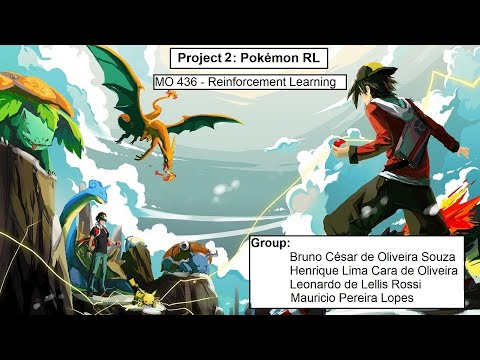

In [19]:
from IPython.display import YouTubeVideo

YouTubeVideo('pgIfTQnjdzA', width=960, height=540)

# Discussion

Differently from the works found in the literature, which train and validate their models only against a RandomPlayer, our methods were trained against a MaxDamagePlayer and validated against a MaxDamagePlayer and against a RandomPlayer, showing significant improvements. All of our implemented methods showed better results than most of our methods from P1 with the same battle configurations.

Our DQN agent, in a stochastic environment, with 300k training steps, averaged $69,57\%$ wins against a MaxDamagePlayer and $98,59\%$ wins against a RandomPlayer. With 900k training steps, in a stochastic environment, our DQN agent averaged $60,97\%$ wins against a MaxDamagePlayer and $99,28\%$ wins against a RandomPlayer. In a deterministic environment, with 300k training steps, the agent averaged $71,71\%$ wins against a MaxDamagePlayer and $98,5\%$ wins against a RandomPlayer. With 900k training steps, in a deterministic environment, our DQN agent averaged $74,62\%$ wins against a MaxDamagePlayer and $98,89\%$ wins against a RandomPlayer. In a visual analysis of the battles, we noticed that the agent promoted switches to Pokémon with super-effective attacks against the opponent. In the stochastic environment, the agent also made use of a combo with Sleep Powder (cause status to the opponent) and Leech Seed (removes opponent's Health Points in each turn and adds them to ours). Compared to the other implemented methods, the agent with DQN trained by 900k steps was the one with the worst performance against MaxDamagePlayer.

Our Double-DQN agent, in a stochastic environment, with 300k training steps, averaged $67\%$ wins against a MaxDamagePlayer and $98\%$ wins against a RandomPlayer. With 900k training steps, in a stochastic environment, our DQN agent averaged $83,94\%$ wins against a MaxDamagePlayer and $99,24\%$ wins against a RandomPlayer. In a deterministic environment, with 300k training steps, the agent averaged $77,08\%$ wins against a MaxDamagePlayer and $99,37\%$ wins against a RandomPlayer. With 900k training steps, in a deterministic environment, our DQN agent averaged $77,92\%$ wins against a MaxDamagePlayer and $98,98\%$ wins against a RandomPlayer. In a visual analysis of the battles, we noticed that the agent promoted switches to better type Pokémon, to not suffer super-effective attacks, and to Pokémon with super-effective attacks against the opponent. 

Our PPO agent, in a stochastic environment, with 300k training steps, averaged $88,93\%$ wins against a MaxDamagePlayer and $99,94\%$ wins against a RandomPlayer. With 900k training steps, in a stochastic environment, our PPO agent averaged $88,21\%$ wins against a MaxDamagePlayer and $99,67\%$ wins against a RandomPlayer. In a deterministic environment, with 300k training steps, the agent averaged $74,86\%$ wins against a MaxDamagePlayer and $99,73\%$ wins against a RandomPlayer. With 900k training steps, in a deterministic environment, our PPO agent averaged $82,75\%$ wins against a MaxDamagePlayer and $99,49\%$ wins against a RandomPlayer. In a visual analysis of the battles, we noticed that the agent also promoted switches to better type Pokémon, to not suffer super-effective attacks, and to Pokémon with super-effective attacks against the opponent.  In addition, the agent made a lot of use of the Giga Drain damage move (promotes damage and recovers HP), even when this move wasn't very effective. We hypothesize that this occurs because the Player realized that, even if the move was not very effective, it promoted a decrease in the opponent's Health Points and an increase in ours, promoting greater rewards.

Our REINFORCE Keras agent, in a stochastic environment, with 10k training steps, averaged $87,52\%$ wins against a MaxDamagePlayer and $99,43\%$ wins against a RandomPlayer. With 30k training steps, in a stochastic environment, our REINFORCE Keras agent averaged $85,07\%$ wins against a MaxDamagePlayer and $99,14\%$ wins against a RandomPlayer. In a deterministic environment, with 10k training steps, the agent averaged $60,16\%$ wins against a MaxDamagePlayer and $99,13\%$ wins against a RandomPlayer. With 30k training steps, in a deterministic environment, our REINFORCE Keras agent averaged $75,97\%$ wins against a MaxDamagePlayer and $99,55\%$ wins against a RandomPlayer. In a visual analysis of the battles, we noticed behaviors similar to the ones learned by the PPO agent, mainly the agent made many uses of Giga Drain damage move (causes damage and recovers HP), even when this move wasn't very effective. Again, we hypothesize that the agent learned to have a preference for this move because causing a decrease in the opponent's Pokémon Health Points and an increase in ours is a way to promote a greater accumulation of rewards in the long run of the episode.

In Pytorch Framework, the models perfomed as good as the Keras using our REINFORCE Keras agent, and slighty worst when running out the DQN model. For Pytorch DQN model in stochastice environment with 5k battles, the model won around $30,00\%$ against MaxDamagePlayer, while with the RandomDamagePlayer the agent won almost $95,00\%$ of the battle. The main contribution, however, is the available GPU in the Pytorch Framework. It decreased sharply the time training (around $50\%$ faster) and allow us, from now on, to try new architectures of the models and new hyperparameters in order to improve the results. As a negative point, and probably the explanation about the lower accuracy results acquired, is that Pytorch does not provide an easy API to apply Reinforcement Learning so it is easier prone to errors. In addition, in order to use the Pytorch correctly, several data transformation into tensor was necessary. Therefore, a thorough and detailed analysis of the code is more necessary than when using Keras Framework. For future improvements, we intend to analyse the DQNAgent Keras algorithm itself to compared how the models were build and try to improve the results of the Pytorch Framework.

# Conclusion

Given the complexity of a Pokémon battle (as shown, $1,016,064$ states and $9,144,576$ possibilities), the implemented methods were able to generalize the states and explore the best reward acquisitions, with all methods performing better than a RandomPlayer, a MaxPlayer and most of our tabular methods with the same battle configurations. The methods showed increasing learning, in view of the increase in rewards and victory rate as battles went on.

Particularly, PPO found it easier to generalize the states, given the influence of the Actor-Critic network.

In addition to the difference in training and validating using a MaxDamagePlayer (getting good results), our PPO method showed better results than related work against a RandomPlayer.

As future work, we propose to consider as inputs for our networks the types of Pokémon, their abilities and possible side effects of moves.

In the professional scope, it is important to mention that this project allowed us to know theoretically and practically the models and techniques of Reinforcement Learning. Since RL is an area increasingly demanded by current technologies, this project is of particular importance, as it brought us relatively in-depth knowledge of RL techniques, how to apply and improve them. Finally, it is important to emphasize, for everyone on the team, that after this project, we are able to "walk on our own two legs" to go deeper into the RL area and contribute to this growing community.

# Contributions

## Methods

### Deep Q-Learning - Keras
* **Code development**: Leonardo;
* **Code review**: Bruno, Henrique, Maurício;
* **Experiments**: Leonardo.

### DQN - Pytorch
* **Code development**: Bruno;
* **Code review**: Henrique, Leonardo, Maurício;
* **Experiments**: Bruno.

### Double Deep Q-Learning - Keras
* **Code development**: Leonardo;
* **Code review**: Bruno, Henrique, Maurício;
* **Experiments**: Leonardo.

### PPO
* **Code development**: Leonardo;
* **Code review**: Bruno, Henrique, Maurício;
* **Experiments**: Leonardo.

### REINFORCE - Keras
* **Code development**: Henrique;
* **Code review**: Bruno, Leonardo, Maurício;
* **Experiments**: Henrique.

### REINFORCE - Pytorch
* **Code development**: Bruno;
* **Code review**: Henrique, Leonardo, Maurício;
* **Experiments**: Bruno.

## Video
* **Editing**: Leonardo;
* **Review**: Bruno, Henrique, Maurício.

## Report
* **Writting**: Leonardo, Henrique, Bruno, Mauricio.